# Comparison MySql and Cassandra Databases

Two databases are being compared: MySQL and Cassandra, using the YCSB (Yahoo! Cloud Serving Benchmark) with a total of 100,000 records in both cases.

Operations compared:

    - CLEANUP: An operation related to system cleanup or maintenance, probably related to garbage collection or release of unused resources.
    - INSERT: An operation to insert new records into the database.

LOGS: 100,000 records are used in both cases to measure the performance and latency of each database during operations.


## MySql Results

This is the result after using YCSB with 100000 records

bin/ycsb.sh load jdbc -P ./jdbc-binding/conf/db.properties -P workloads/workloada -p recordcount=100000

Loading workload...
Starting test.
Adding shard node URL: jdbc:mysql://localhost:3306/BenchTest
Using shards: 1, batchSize:-1, fetchSize: -1
DBWrapper: report latency for each error is false and specific error codes to track for latency are: []
[OVERALL], RunTime(ms), 346152
[OVERALL], Throughput(ops/sec), 288.890429637847
[TOTAL_GCS_PS_Scavenge], Count, 18
[TOTAL_GC_TIME_PS_Scavenge], Time(ms), 37
[TOTAL_GC_TIME_%_PS_Scavenge], Time(%), 0.010688945896600337
[TOTAL_GCS_PS_MarkSweep], Count, 0
[TOTAL_GC_TIME_PS_MarkSweep], Time(ms), 0
[TOTAL_GC_TIME_%_PS_MarkSweep], Time(%), 0.0
[TOTAL_GCs], Count, 18
[TOTAL_GC_TIME], Time(ms), 37
[TOTAL_GC_TIME_%], Time(%), 0.010688945896600337
[CLEANUP], Operations, 1
[CLEANUP], AverageLatency(us), 2305.0
[CLEANUP], MinLatency(us), 2304
[CLEANUP], MaxLatency(us), 2305
[CLEANUP], 95thPercentileLatency(us), 2305
[CLEANUP], 99thPercentileLatency(us), 2305
[INSERT], Operations, 100000
[INSERT], AverageLatency(us), 3452.39278
[INSERT], MinLatency(us), 2328
[INSERT], MaxLatency(us), 286975
[INSERT], 95thPercentileLatency(us), 5039
[INSERT], 99thPercentileLatency(us), 6359
[INSERT], Return=OK, 100000

## Cassandra Results

This is the result after using YCSB with 100000 records

bin/ycsb.sh load cassandra-cql -P workloads/workloada -p hosts=localhost -p recordcount=100000


Loading workload...
Starting test.
SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.
DBWrapper: report latency for each error is false and specific error codes to track for latency are: []
[OVERALL], RunTime(ms), 25079
[OVERALL], Throughput(ops/sec), 3987.3998165796083
[TOTAL_GCS_PS_Scavenge], Count, 14
[TOTAL_GC_TIME_PS_Scavenge], Time(ms), 33
[TOTAL_GC_TIME_%_PS_Scavenge], Time(%), 0.1315841939471271
[TOTAL_GCS_PS_MarkSweep], Count, 0
[TOTAL_GC_TIME_PS_MarkSweep], Time(ms), 0
[TOTAL_GC_TIME_%_PS_MarkSweep], Time(%), 0.0
[TOTAL_GCs], Count, 14
[TOTAL_GC_TIME], Time(ms), 33
[TOTAL_GC_TIME_%], Time(%), 0.1315841939471271
[CLEANUP], Operations, 1
[CLEANUP], AverageLatency(us), 2214912.0
[CLEANUP], MinLatency(us), 2213888
[CLEANUP], MaxLatency(us), 2215935
[CLEANUP], 95thPercentileLatency(us), 2215935
[CLEANUP], 99thPercentileLatency(us), 2215935
[INSERT], Operations, 100000
[INSERT], AverageLatency(us), 220.78219
[INSERT], MinLatency(us), 111
[INSERT], MaxLatency(us), 65247
[INSERT], 95thPercentileLatency(us), 264
[INSERT], 99thPercentileLatency(us), 359
[INSERT], Return=OK, 100000

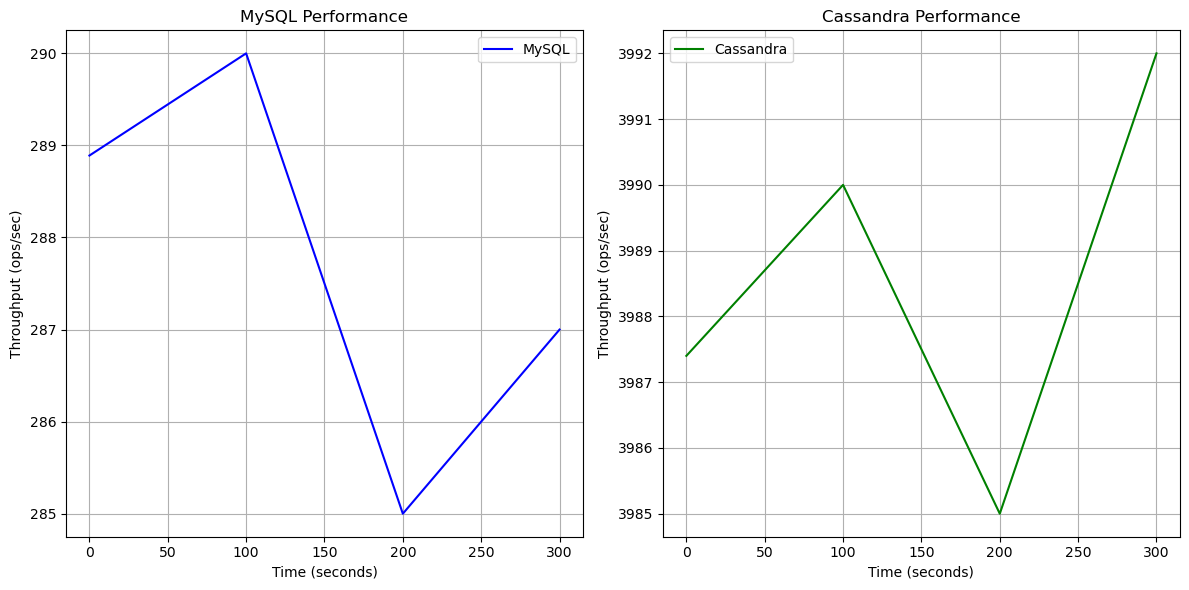

In [1]:
import matplotlib.pyplot as plt

# Example data for MySQL
times_mysql = [0, 100, 200, 300]  # Time in seconds
throughput_mysql = [288.89, 290.0, 285.0, 287.0]  # Throughput in ops/sec

# Example data for Cassandra
times_cassandra = [0, 100, 200, 300]  # Time in seconds
throughput_cassandra = [3987.40, 3990.0, 3985.0, 3992.0]  # Throughput in ops/sec

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row and 2 columns

# Plot for MySQL
ax1.plot(times_mysql, throughput_mysql, label='MySQL', color='b')
ax1.set_title('MySQL Performance')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Throughput (ops/sec)')
ax1.grid(True)
ax1.legend()

# Plot for Cassandra
ax2.plot(times_cassandra, throughput_cassandra, label='Cassandra', color='g')
ax2.set_title('Cassandra Performance')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Throughput (ops/sec)')
ax2.grid(True)
ax2.legend()

# Adjust space between subplots
plt.tight_layout()

# Show the plot
plt.show()


MySQL Performance Graph (Left Graph):

    - The first graph (on the left) shows MySQL performance, measured by throughput (ops/sec), at different times (in seconds).
    - The x-axis represents the time in seconds, from 0 to 300 seconds.
    - The y-axis shows the throughput in operations per second (ops/sec). For example, at time 0 seconds, MySQL has a throughput of 288.89 ops/sec, and this value fluctuates slightly as time increases, with a peak of 290 ops/sec.
    - The graph has the title “MySQL Throughput” and includes a grid to make the data points more readable.

Cassandra Performance Graph (Right Graph):

    - The second graph (on the right) presents Cassandra performance, also measured in throughput (ops/sec) over time.
    - The x-axis represents time in seconds, and the y-axis shows throughput in operations per second.
    - Cassandra's throughput is significantly higher than that of MySQL, with values ranging from approximately 3985 ops/sec to 3992 ops/sec, indicating that Cassandra performs much better in terms of throughput under these conditions.
    - The chart has the title “Cassandra Performance” and includes the necessary labels and grid lines.

# Compartions

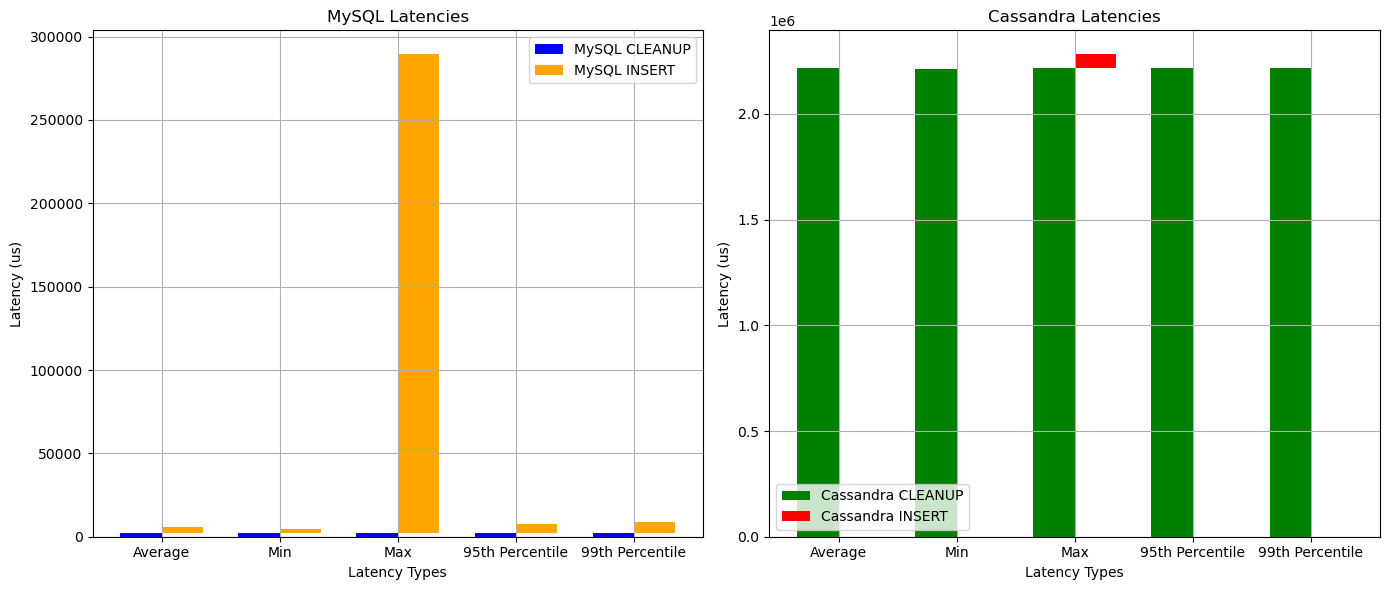

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# MySQL results
mysql_results = {
    'CLEANUP': {
        'Average': 2305.0,
        'Min': 2304,
        'Max': 2305,
        '95th Percentile': 2305,
        '99th Percentile': 2305
    },
    'INSERT': {
        'Average': 3452.39278,
        'Min': 2328,
        'Max': 286975,
        '95th Percentile': 5039,
        '99th Percentile': 6359
    }
}

# Cassandra results
cassandra_results = {
    'CLEANUP': {
        'Average': 2214912.0,
        'Min': 2213888,
        'Max': 2215935,
        '95th Percentile': 2215935,
        '99th Percentile': 2215935
    },
    'INSERT': {
        'Average': 220.78219,
        'Min': 111,
        'Max': 65247,
        '95th Percentile': 264,
        '99th Percentile': 359
    }
}

# Define categories and values for latencies
categories = ['Average', 'Min', 'Max', '95th Percentile', '99th Percentile']
mysql_cleanup = [mysql_results['CLEANUP'][cat] for cat in categories]
mysql_insert = [mysql_results['INSERT'][cat] for cat in categories]
cassandra_cleanup = [cassandra_results['CLEANUP'][cat] for cat in categories]
cassandra_insert = [cassandra_results['INSERT'][cat] for cat in categories]

# Create the bar chart with two subplots
x = np.arange(len(categories))  # the position of the categories on the X-axis
width = 0.35  # Bar width

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row and 2 columns for the charts

# MySQL plot
ax1.bar(x - width/2, mysql_cleanup, width, label='MySQL CLEANUP', color='blue')
ax1.bar(x + width/2, mysql_insert, width, label='MySQL INSERT', color='orange', bottom=mysql_cleanup)
ax1.set_title('MySQL Latencies')
ax1.set_xlabel('Latency Types')
ax1.set_ylabel('Latency (us)')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(True)

# Cassandra plot
ax2.bar(x - width/2, cassandra_cleanup, width, label='Cassandra CLEANUP', color='green')
ax2.bar(x + width/2, cassandra_insert, width, label='Cassandra INSERT', color='red', bottom=cassandra_cleanup)
ax2.set_title('Cassandra Latencies')
ax2.set_xlabel('Latency Types')
ax2.set_ylabel('Latency (us)')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.grid(True)

# Adjust space between subplots
plt.tight_layout()

# Show the charts
plt.show()


MySQL Latencies:

- In the MySQL Latencies Chart (Left), we see that the latencies of the “CLEANUP” and “INSERT” operations are relatively low and consistent across the different latency types		(Average, Minimum, Maximum, 95th Percentile and 99th Percentile).
- For MySQL:
	CLEANUP latencies are quite stable, with values around 2305 microseconds.
        INSERT latencies are significantly higher, with an average latency of 3452 microseconds, but the maximum latency is as high as 286.975 microseconds.
- The “INSERT” operation for MySQL shows some variability, indicating that some inserts take much longer than others. However, the latencies are still reasonable overall.

Cassandra Latencies:

- In the Cassandra Latency Chart (Right), the latencies for “CLEANUP” and “INSERT” are much higher than MySQL.
- For Cassandra:
        CLEANUP latencies are very high, averaging around 2.2 million microseconds (2.2 milliseconds), and latencies do not vary much.
        INSERT latencies are much lower than CLEANUP latencies, with values around 220 microseconds on average.
- Latencies for “INSERT” operations in Cassandra show a large spread, with maximum values reaching 65,247 microseconds, but the average is still relatively low.


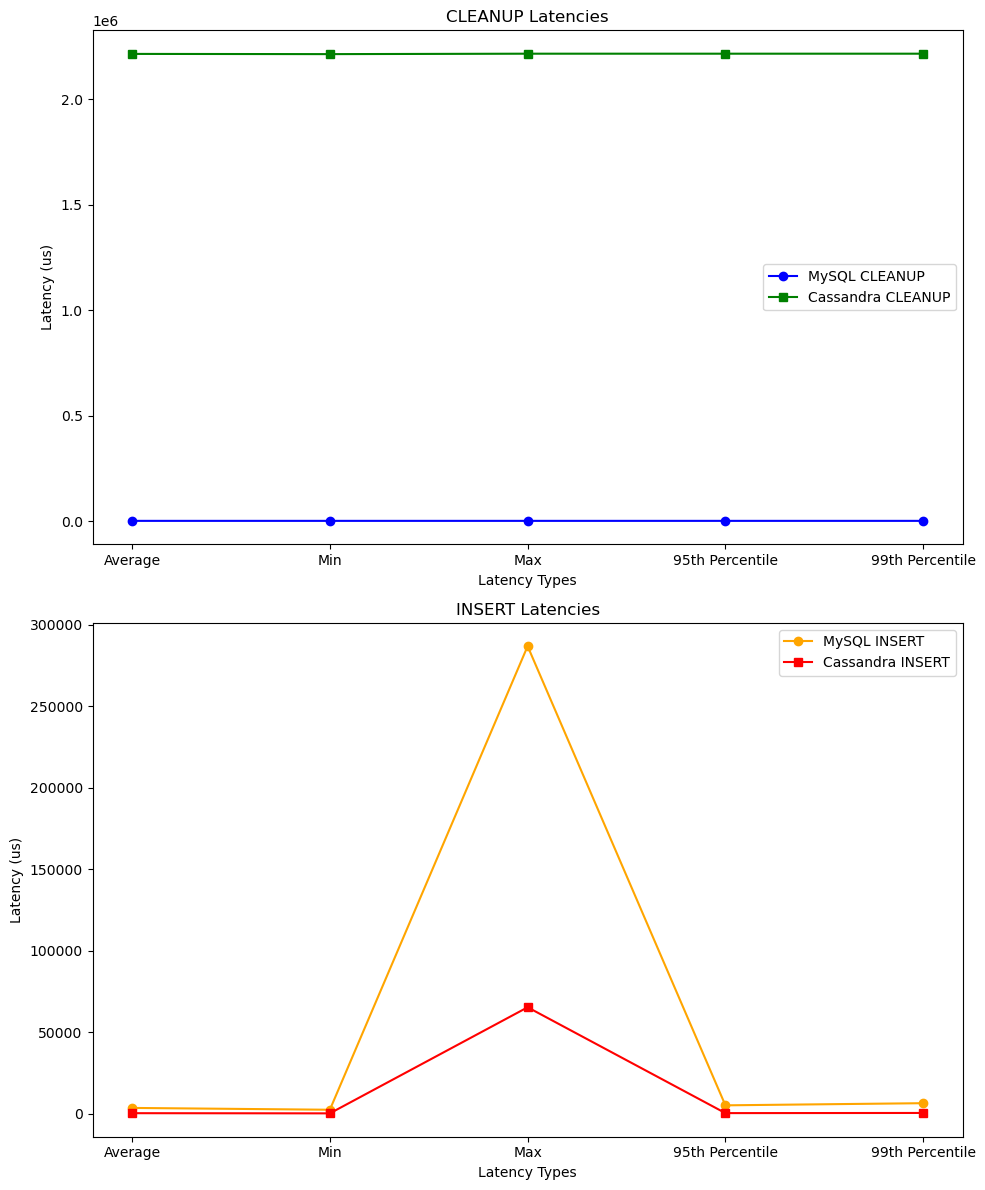

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# MySQL results
mysql_results = {
    'CLEANUP': {
        'Average': 2305.0,
        'Min': 2304,
        'Max': 2305,
        '95th Percentile': 2305,
        '99th Percentile': 2305
    },
    'INSERT': {
        'Average': 3452.39278,
        'Min': 2328,
        'Max': 286975,
        '95th Percentile': 5039,
        '99th Percentile': 6359
    }
}

# Cassandra results
cassandra_results = {
    'CLEANUP': {
        'Average': 2214912.0,
        'Min': 2213888,
        'Max': 2215935,
        '95th Percentile': 2215935,
        '99th Percentile': 2215935
    },
    'INSERT': {
        'Average': 220.78219,
        'Min': 111,
        'Max': 65247,
        '95th Percentile': 264,
        '99th Percentile': 359
    }
}

# Define categories and values for latencies
categories = ['Average', 'Min', 'Max', '95th Percentile', '99th Percentile']
mysql_cleanup = [mysql_results['CLEANUP'][cat] for cat in categories]
mysql_insert = [mysql_results['INSERT'][cat] for cat in categories]
cassandra_cleanup = [cassandra_results['CLEANUP'][cat] for cat in categories]
cassandra_insert = [cassandra_results['INSERT'][cat] for cat in categories]

# Create the plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Cleanup latencies plot
axs[0].plot(categories, mysql_cleanup, label='MySQL CLEANUP', marker='o', linestyle='-', color='blue')
axs[0].plot(categories, cassandra_cleanup, label='Cassandra CLEANUP', marker='s', linestyle='-', color='green')
axs[0].set_title('CLEANUP Latencies')
axs[0].set_xlabel('Latency Types')
axs[0].set_ylabel('Latency (us)')
axs[0].legend()

# Insert latencies plot
axs[1].plot(categories, mysql_insert, label='MySQL INSERT', marker='o', linestyle='-', color='orange')
axs[1].plot(categories, cassandra_insert, label='Cassandra INSERT', marker='s', linestyle='-', color='red')
axs[1].set_title('INSERT Latencies')
axs[1].set_xlabel('Latency Types')
axs[1].set_ylabel('Latency (us)')
axs[1].legend()

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


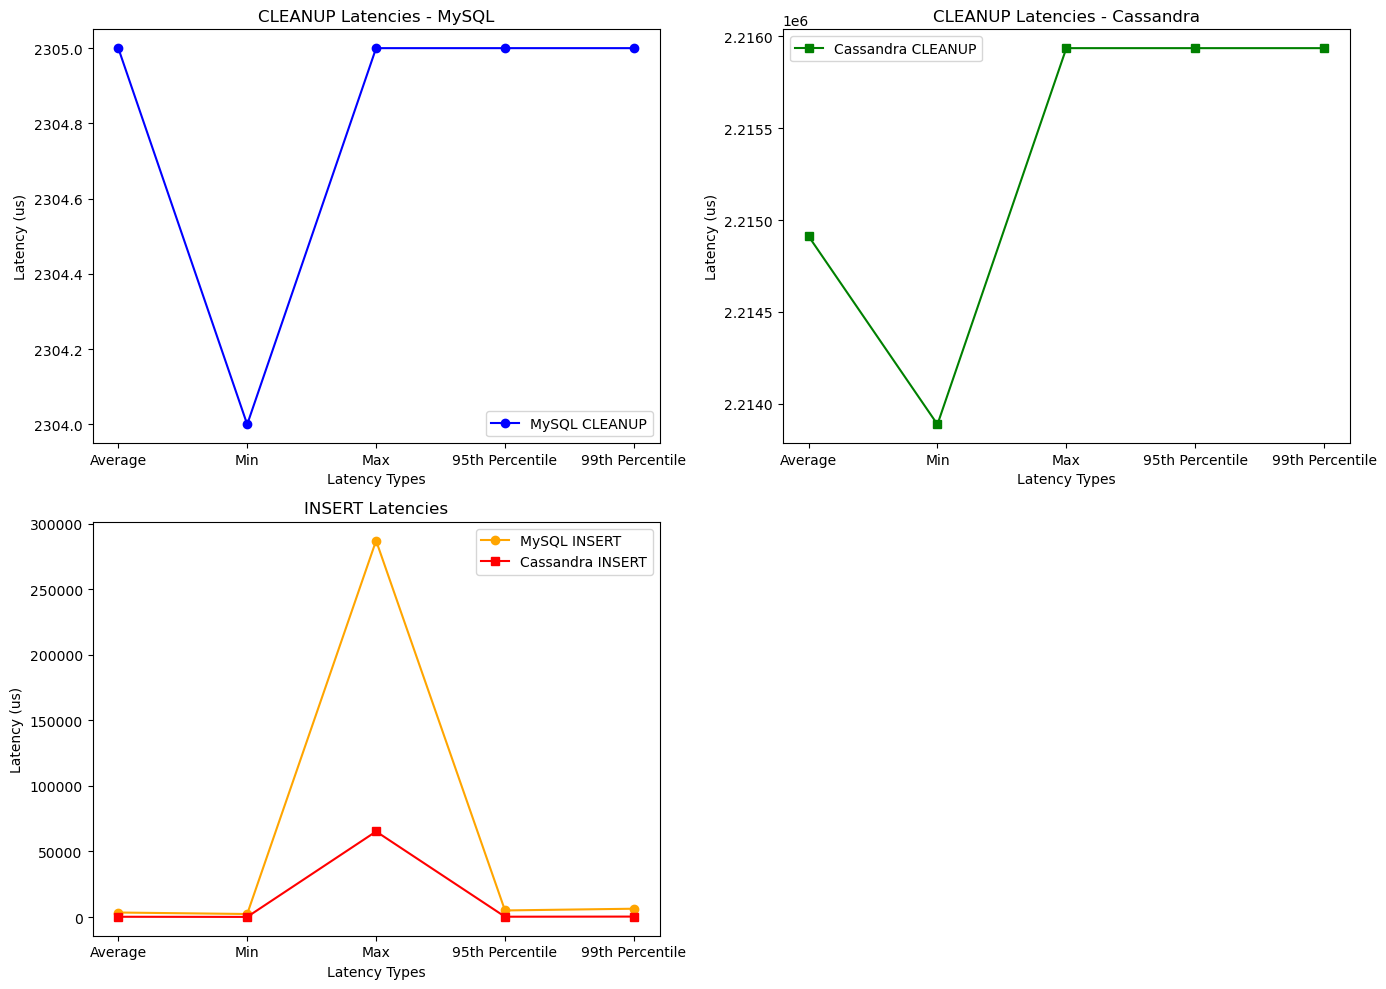

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# MySQL results
mysql_results = {
    'CLEANUP': {
        'Average': 2305.0,
        'Min': 2304,
        'Max': 2305,
        '95th Percentile': 2305,
        '99th Percentile': 2305
    },
    'INSERT': {
        'Average': 3452.39278,
        'Min': 2328,
        'Max': 286975,
        '95th Percentile': 5039,
        '99th Percentile': 6359
    }
}

# Cassandra results
cassandra_results = {
    'CLEANUP': {
        'Average': 2214912.0,
        'Min': 2213888,
        'Max': 2215935,
        '95th Percentile': 2215935,
        '99th Percentile': 2215935
    },
    'INSERT': {
        'Average': 220.78219,
        'Min': 111,
        'Max': 65247,
        '95th Percentile': 264,
        '99th Percentile': 359
    }
}

# Define categories and values for latencies
categories = ['Average', 'Min', 'Max', '95th Percentile', '99th Percentile']
mysql_cleanup = [mysql_results['CLEANUP'][cat] for cat in categories]
mysql_insert = [mysql_results['INSERT'][cat] for cat in categories]
cassandra_cleanup = [cassandra_results['CLEANUP'][cat] for cat in categories]
cassandra_insert = [cassandra_results['INSERT'][cat] for cat in categories]

# Create the plots in 2 rows and 2 columns, where the INSERT plot takes up both columns in the bottom row
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MySQL CLEANUP latency plot
axs[0, 0].plot(categories, mysql_cleanup, label='MySQL CLEANUP', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('CLEANUP Latencies - MySQL')
axs[0, 0].set_xlabel('Latency Types')
axs[0, 0].set_ylabel('Latency (us)')
axs[0, 0].legend()

# Cassandra CLEANUP latency plot
axs[0, 1].plot(categories, cassandra_cleanup, label='Cassandra CLEANUP', marker='s', linestyle='-', color='green')
axs[0, 1].set_title('CLEANUP Latencies - Cassandra')
axs[0, 1].set_xlabel('Latency Types')
axs[0, 1].set_ylabel('Latency (us)')
axs[0, 1].legend()

# INSERT latencies plot (spanning both columns in the second row)
axs[1, 0].plot(categories, mysql_insert, label='MySQL INSERT', marker='o', linestyle='-', color='orange')
axs[1, 0].plot(categories, cassandra_insert, label='Cassandra INSERT', marker='s', linestyle='-', color='red')
axs[1, 0].set_title('INSERT Latencies')
axs[1, 0].set_xlabel('Latency Types')
axs[1, 0].set_ylabel('Latency (us)')
axs[1, 0].legend()

# Remove the empty plot in the second column of the bottom row
axs[1, 1].axis('off')

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


# Which one is better?

    - For “INSERT” Operations:
	Cassandra is much faster than MySQL. The average latency for “INSERT” in Cassandra is only 220 microseconds, while in MySQL it is much higher, around 3452 microseconds. Also,“INSERT” latencies in Cassandra do not show as much jitter as in MySQL, which makes Cassandra's performance more predictable.
    
    - For “CLEANUP” Operations:
	MySQL outperforms Cassandra in “CLEANUP” latencies. MySQL's CLEANUP operation has much lower latencies (around 2305 microseconds on average) compared to Cassandra's 2.2 million microseconds.
 
	Cassandra's CLEANUP operation seems to take significantly longer and could become a bottleneck in certain use cases.

# Conclusion:

- If “INSERT” performance is the priority, Cassandra is the better choice due to its much lower latencies.
- If the performance of the “CLEANUP” operation is more critical, MySQL is better because it has much lower latencies for this operation.

However, in general, Cassandra excels in handling high throughput on inserts, but MySQL might perform better for cleanup or maintenance tasks where low latency is crucial.